In [1]:
#01 - Import and consolidate the results for analysis
import pandas as pd
import numpy as np
import datetime as dt

df = pd.read_csv("results_test.csv", encoding="utf-8")
df['lon2'] = df['lon']-360
df['latlon'] = df['lat'].astype(str) + "|" + df['lon'].astype(str)
df['start_date'] = pd.to_datetime(df['start_date'])
df['month'] = pd.DatetimeIndex(df['start_date']).month
df['month2'] = df['month'].astype(str).str.zfill(2)
df['year'] = pd.DatetimeIndex(df['start_date']).year
df['yearmonth'] = df['year'].astype(str) + '-' + df['month2'].astype(str)
df['err'] = round(df['err'],3)
df['phys_err'] = round(df['phys_err'],3)

#Seasons
def season (x):
    if x in [12,1,2]:
        return 'winter'
    elif x in [3,4,5]:
        return 'spring'
    elif x in [6,7,8]:
        return 'summer'
    elif x in [9,10,11]:
        return 'fall'

#Locations
locations = pd.read_csv("locations.csv", encoding="utf-8")
locations.rename(columns={"Location": "latlon"}, inplace=True)
locations.sort_values(by=['latlon'], ascending=False)


#Map season and location and extremes
df['season'] = df['month'].apply(season)
df = pd.merge(df, locations, on='latlon')
df['heatwave'] = df['tmp2m'] >34
df['coldwave'] = df['tmp2m'] <-10

#Functions / Metrics
def mbe (x):
    return round(np.mean(x),3)

def mae (x):
    return round(np.mean(abs(x)), 3)

def sd (x):
    return round(np.std(x), 3)

df

,key,start_date,lat,lon,xgboost_tmp2m_pred_zscore,tmp2m_daily_mean,tmp2m_daily_std,tmp2m_zscore,tmp2m,xgboost_tmp2m_pred,...,month,month2,year,yearmonth,season,State,Sub-Region,Region,heatwave,coldwave
0,2019-10-01|27.25|261.75,2019-10-01,27.25,261.75,1.028229,22.870967,2.045002,-0.014837,22.840626,24.973697,...,10,10,2019,2019-10,fall,Texas,West South Central,South,False,False
1,2019-10-08|27.25|261.75,2019-10-08,27.25,261.75,1.093624,21.721882,1.985609,-1.286955,19.166492,23.893391,...,10,10,2019,2019-10,fall,Texas,West South Central,South,False,False
2,2019-10-15|27.25|261.75,2019-10-15,27.25,261.75,1.043933,20.675154,2.121438,-1.040800,18.467161,22.889792,...,10,10,2019,2019-10,fall,Texas,West South Central,South,False,False
3,2019-10-22|27.25|261.75,2019-10-22,27.25,261.75,0.892237,19.451975,2.304340,-1.896681,15.081376,21.507993,...,10,10,2019,2019-10,fall,Texas,West South Central,South,False,False
4,2019-10-29|27.25|261.75,2019-10-29,27.25,261.75,0.883454,18.518180,2.384524,-1.176233,15.713424,20.624798,...,10,10,2019,2019-10,fall,Texas,West South Central,South,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26393,2021-06-29|47.25|273.75,2021-06-29,47.25,273.75,-0.061508,15.384313,2.808936,0.734029,17.446154,15.211542,...,6,06,2021,2021-06,summer,Michigan,East North Central,Midwest,False,False
26394,2020-07-07|47.25|273.75,2020-07-07,47.25,273.75,-0.408582,16.091479,2.732136,-0.339037,15.165182,14.975177,...,7,07,2020,2020-07,summer,Michigan,East North Central,Midwest,False,False
26395,2020-07-14|47.25|273.75,2020-07-14,47.25,273.75,-0.268441,16.598514,2.503675,-0.350005,15.722215,15.926424,...,7,07,2020,2020-07,summer,Michigan,East North Central,Midwest,False,False
26396,2020-07-21|47.25|273.75,2020-07-21,47.25,273.75,-0.357121,16.739847,2.226671,0.118659,17.004061,15.944656,...,7,07,2020,2020-07,summer,Michigan,East North Central,Midwest,False,False


In [2]:
#02 - Choose a start date and get a plottable subset
sd = '2019-10-01'
df_subset = df[df['start_date']==sd]
df_subset

,key,start_date,lat,lon,xgboost_tmp2m_pred_zscore,tmp2m_daily_mean,tmp2m_daily_std,tmp2m_zscore,tmp2m,xgboost_tmp2m_pred,...,month,month2,year,yearmonth,season,State,Sub-Region,Region,heatwave,coldwave
0,2019-10-01|27.25|261.75,2019-10-01,27.25,261.75,1.028229,22.870967,2.045002,-0.014837,22.840626,24.973697,...,10,10,2019,2019-10,fall,Texas,West South Central,South,False,False
134,2019-10-01|27.25|277.75,2019-10-01,27.25,277.75,0.602405,23.886820,1.095936,3.186881,27.379438,24.547017,...,10,10,2019,2019-10,fall,Florida,South Atlantic,South,False,False
268,2019-10-01|27.25|279.75,2019-10-01,27.25,279.75,0.285290,24.353932,0.992701,2.720873,27.054945,24.637140,...,10,10,2019,2019-10,fall,Florida,South Atlantic,South,False,False
402,2019-10-01|29.25|259.75,2019-10-01,29.25,259.75,0.677093,21.986072,2.040617,-0.325284,21.322292,23.367759,...,10,10,2019,2019-10,fall,Texas,West South Central,South,False,False
536,2019-10-01|29.25|261.75,2019-10-01,29.25,261.75,1.178884,21.320222,2.163752,-0.391424,20.473276,23.871034,...,10,10,2019,2019-10,fall,Texas,West South Central,South,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25728,2019-10-01|47.25|265.75,2019-10-01,47.25,265.75,0.125857,5.471794,2.396989,-0.359124,4.610979,5.773473,...,10,10,2019,2019-10,fall,Minnesota,West North Central,Midwest,False,False
25862,2019-10-01|47.25|267.75,2019-10-01,47.25,267.75,0.344675,4.896298,2.243365,0.032262,4.968673,5.669530,...,10,10,2019,2019-10,fall,Minnesota,West North Central,Midwest,False,False
25996,2019-10-01|47.25|269.75,2019-10-01,47.25,269.75,0.667635,5.444517,2.186580,-0.308383,4.770213,6.904355,...,10,10,2019,2019-10,fall,Wisconsin,East North Central,Midwest,False,False
26130,2019-10-01|47.25|271.75,2019-10-01,47.25,271.75,0.616777,5.737526,2.106367,0.280217,6.327767,7.036685,...,10,10,2019,2019-10,fall,Michigan,East North Central,Midwest,False,False


In [43]:
#Create grids
#latlonpivot of values
chartdata = pd.pivot_table(data=df_subset, index=['lat'], columns='lon2', values='phys', aggfunc=np.sum) #fill_value=0
chartdata = chartdata.sort_values(by ='lat', ascending = False)
#interpolated grid
#types = linear/akima/barycentric/cubic/cubispline/from_derivates/index/krogh/nearest/pad/pchip/piecewise_polynomial/polynomial/quadric/slinear/spline/time/zero/bfill/pad/ffill
chartdata2 = chartdata.interpolate(method='linear')
#gaussian grid using scipy
from scipy.ndimage.filters import gaussian_filter
chartdata3 = gaussian_filter(chartdata2, 0.0004, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)
#gaussian grid using sklearn
#gaussian grid using astropy
from astropy.utils.data import get_pkg_data_filename
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve
kernel = Gaussian2DKernel(x_stddev=1)
chartdata4 = convolve(chartdata, kernel)

<Figure size 432x288 with 0 Axes>

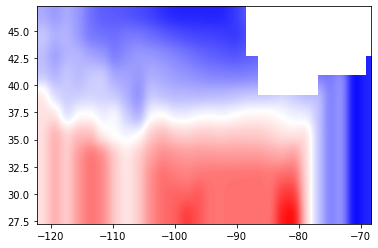

In [58]:
import matplotlib.pyplot as plt
import matplotlib.image
from io import BytesIO
from PIL import Image

x_list = np.array(df_subset.lat)
z_list = np.array(df_subset.lon2)
fig=plt.figure()
fig, ax = plt.subplots()
#plt.figure(figsize=plt.figaspect(2))
#other interpolation choices = gaussian/antialiased/nearest/bilinear/bicubic/spline16/spline36/hanning/hamming/hermite/
#kaiser/quadric/catrom/gaussian/bessel/mitchell/sinc/lanczos/blackman
ax.imshow(chartdata2, interpolation="gaussian", cmap='bwr', extent=[z_list.min(), z_list.max(), x_list.min(), x_list.max()],
           origin="upper", aspect='auto')
#axes = fig.add_axes([max(z_list),min(z_list),max(x_list),min(x_list)])

with io.BytesIO() as memf:
    extent = ax.get_window_extent()
    extent = extent.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(memf, format='PNG', bbox_inches=extent)
    memf.seek(0)
    img = Image.open(memf).convert('RGB')
    arr = np.asarray(img)
    img.save('test2.png')


# Show the positions of the sample points, just to have some reference
ax.set_autoscale_on(False)
plt.scatter(x_list,z_list,400,facecolors='none')
#graphic = BytesIO()
#plt.colorbar(location = 'bottom')
#fig = plt.gcf()
fig.savefig('test.png', dpi = 300)
plt.show()

In [ ]:
#import matplotlib.image as img
#nparr = img.imread('test.png')  #rgba 1110

#import matplotlib.pyplot as plt #rgba 1110
#imagedata = plt.imread('test.png')
#imagedata

#import cv2
#nparr2 = cv2.imread('test.png') #rgb 255, 255, 255
#nparr2

In [128]:
#Try to import the image into rgb grid for analysis - pillow format
from PIL import Image
import io
import numpy as np
imframe = Image.open('test2.png') #rgba 255, 255, 255, 0
print(imframe.size)
width, height = imframe.size
x, y = np.meshgrid(range(width), range(height))

npframe = np.concatenate([img.getdata(), x.reshape(-1, 1), y.reshape(-1, 1)], axis=1)
imgrgbdf = pd.DataFrame(npframe, columns=('r', 'g', 'b', 'x', 'y'))
imgrgbdf['lat'] = ""; imgrgbdf['lon'] = ""
lats = df_subset.lat.unique()
lons= df_subset.lon2.unique()
lats = np.arange(lats.min(), lats.max(), (lats.max()-lats.min())/217)
print(lats[0]); print(lats[216])
print(lats.shape)
lons = np.arange(lons.min(), lons.max(), (lons.max()-lons.min())/334)
print(lons[0]); print(lons[333])
print(lons.shape)
#x = width = lon = 333; y = height = lats = 216
imgrgbdf['lon'] = lons[imgrgbdf['x']]
imgrgbdf['lat'] = lats[216-imgrgbdf['y']]

(334, 217)
27.25
47.15783410138269
(217,)
-122.25
-68.41167664670834
(334,)


<GeoAxesSubplot:title={'center':'r values'}>

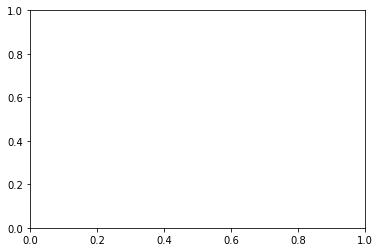

In [129]:
#create a geopandas dataframe and plot
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
gdf = gpd.GeoDataFrame(
    imgrgbdf, geometry=gpd.points_from_xy(imgrgbdf.lon, imgrgbdf.lat))
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
gplt.pointplot(gdf, projection=gcrs.AlbersEqualArea(), limits=(2, 30), cmap='bwr', ax=ax, alpha=0.5, hue='r', legend=True)
#plt.title("r values")
#plt.savefig("r.png", bbox_inches='tight', pad_inches=0.1)


In [ ]:
#Spatial Heatplot
import matplotlib.pyplot as plt
import matplotlib.image
from io import BytesIO
from PIL import Image
import numpy as np
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs


#GRID OF PHYS FORECASTS FROM ORIGINAL DATAFRAME
chartdata = pd.pivot_table(data=df_subset, index=['lat'], columns='lon2', values='phys', aggfunc=np.sum) #fill_value=0
chartdata = chartdata.sort_values(by ='lat', ascending = False)
#linear interpolate
chartdata2 = chartdata.interpolate(method='linear')

#MATPLOTLIB IMSHOW WITH GAUSSIAN INTERPOLATION AND BWR CMAP, CLIPT IT AND SAVE IT
x_list = np.array(df_subset.lat)
z_list = np.array(df_subset.lon2)
fig=plt.figure()
fig, ax = plt.subplots()
ax.imshow(chartdata2, interpolation="gaussian", cmap='bwr', extent=[z_list.min(), z_list.max(), x_list.min(), x_list.max()],
           origin="upper", aspect='auto')
with io.BytesIO() as memf:
    extent = ax.get_window_extent()
    extent = extent.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(memf, format='PNG', bbox_inches=extent)
    memf.seek(0)
    img = Image.open(memf).convert('RGB')
    arr = np.asarray(img)
    img.save('test2.png')
ax.set_autoscale_on(False)
plt.scatter(x_list,z_list,400,facecolors='none')
fig.savefig('test.png', dpi = 300)
plt.show()

#IMPORT THE IMAGE WITH PILLOW INTO NUMPY rgb ARRAY, MAP x,y MESHGRID BASED ON IMAGE WIDTH AND HEIGHT, MAP lat, lon BASED on x, y
imframe = Image.open('test2.png')
#x = width = lon = 333; y = height = lats = 216
width, height = imframe.size
x, y = np.meshgrid(range(width), range(height))
#numpy rgb array to dataframe
npframe = np.concatenate([img.getdata(), x.reshape(-1, 1), y.reshape(-1, 1)], axis=1)
imgrgbdf = pd.DataFrame(npframe, columns=('r', 'g', 'b', 'x', 'y'))
imgrgbdf['lat'] = ""; imgrgbdf['lon'] = ""
lats = df_subset.lat.unique()
lons= df_subset.lon2.unique()
lats = np.arange(lats.min(), lats.max(), (lats.max()-lats.min())/217)
lons = np.arange(lons.min(), lons.max(), (lons.max()-lons.min())/334)
imgrgbdf['lon'] = lons[imgrgbdf['x']]
imgrgbdf['lat'] = lats[216-imgrgbdf['y']]

#CREATE A GEODATAFRAME AND GEOPLOT THE 'r' VALUE
gdf = gpd.GeoDataFrame(
    imgrgbdf, geometry=gpd.points_from_xy(imgrgbdf.lon, imgrgbdf.lat))
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea(), facecolor='lightgray')
gplt.pointplot(gdf, projection=gcrs.AlbersEqualArea(), limits=(2, 30), ax=ax, hue='r', legend=True)
plt.title("r values")
plt.savefig("r.png", bbox_inches='tight', pad_inches=0.1)

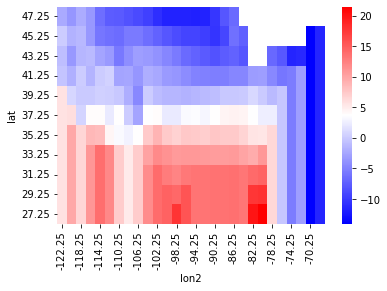

In [138]:
#P1 - Seaborn heatmap
import seaborn as sns
from scipy.interpolate import interp2d
from scipy.ndimage.filters import gaussian_filter

chartdata = pd.pivot_table(data=df_subset, index=['lat'], columns='lon2', values='phys', aggfunc=np.sum) #fill_value=0
chartdata = chartdata.sort_values(by ='lat', ascending = False)
chartdata2 = chartdata.interpolate(method='linear')
sns.heatmap(chartdata2, cmap='bwr')
plt.savefig('figs/heatplots/xgboost_tmp2m_pred_linear.png') #xgboost_tmp2m_pred #phys


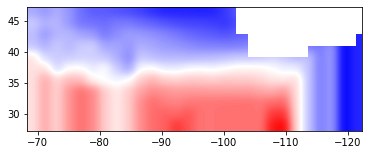

In [142]:
#P2 - Maplotlib gaussian implot
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from scipy.interpolate import interp2d

x_list = np.array(df_subset.lat)
z_list = np.array(df_subset.lon-360)
plt.figure()
#plt.figure(figsize=plt.figaspect(2))
#other interpolation choices = gaussian/antialiased/nearest/bilinear/bicubic/spline16/spline36/hanning/hamming/hermite/
#kaiser/quadric/catrom/gaussian/bessel/mitchell/sinc/lanczos/blackman
fig = plt.imshow(chartdata2,
           extent=[max(z_list),min(z_list),min(x_list),max(x_list)], cmap='bwr',
           origin="upper", interpolation='gaussian')

# Show the positions of the sample points, just to have some reference
fig.axes.set_autoscale_on(False)
plt.scatter(x_list,z_list,400,facecolors='none')
#plt.colorbar(location = 'bottom')
plt.show()

In [ ]:
#P3 - Geoplot projection of gaussian grid
asda

In [ ]:
#P4 - Cartopy projection of gaussian grid
asda

In [ ]:
#P5 - Seaborn KDE plot
asda

In [ ]:
#P6 - Geoplot KDE plot
asda

In [ ]:
#Appendix - other code snippets
#scipy filters - from scipy.interpolate import interp2d
#sklearn filters - from scipy.ndimage.filters import gaussian_filter
#sklearn filters - from scipy.ndimage.filters import gaussian_filter

In [ ]:
#Other Kernel shape available like KDE Quartic Kernel, Gaussian, Triweight, Epanechnikov, Triangular, etc.

#Heatmap with KDE Quartic Kernel
import matplotlib.pyplot as plt
import numpy as np
import math

#POINT DATASET
x=df_subset['lat']
y=df_subset['lon']

#DEFINE GRID SIZE AND RADIUS(h)
grid_size=1
h=10

#GETTING X,Y MIN AND MAX
x_min=min(x)
x_max=max(x)
y_min=min(y)
y_max=max(y)

#CONSTRUCT GRID
x_grid=np.arange(x_min-h,x_max+h,grid_size)
y_grid=np.arange(y_min-h,y_max+h,grid_size)
x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)

#GRID CENTER POINT
xc=x_mesh+(grid_size/2)
yc=y_mesh+(grid_size/2)

#FUNCTION TO CALCULATE INTENSITY WITH QUARTIC KERNEL
def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P

#PROCESSING
intensity_list=[]
for j in range(len(xc)):
    intensity_row=[]
    for k in range(len(xc[0])):
        kde_value_list=[]
        for i in range(len(x)):
            #CALCULATE DISTANCE
            d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2) 
            if d<=h:
                p=kde_quartic(d,h)
            else:
                p=0
            kde_value_list.append(p)
        #SUM ALL INTENSITY VALUE
        p_total=sum(kde_value_list)
        intensity_row.append(p_total)
    intensity_list.append(intensity_row)

#HEATMAP OUTPUT    
intensity=np.array(intensity_list)
plt.pcolormesh(x_mesh,y_mesh,intensity)
plt.plot(x,y,'ro')
plt.colorbar()
plt.show()

In [ ]:
#02 - Interpolate within the pandas dataframe (Linear, Cubic, Bicubic splines, Triangular)


In [ ]:
#02 - Interpolate using cdo

In [ ]:
#03 - Convert into a Geopandas dataframe and interpolate within the geopandas dataframe
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))


In [ ]:
#04 - Interpolate using scipy and create a dataframe
from scipy import spatial

In [ ]:
#05 - Triangular interpolation using gdal
from osgeo import gdal as gd

In [ ]:
#06 - Interpolate within the matplotlib heatmap's interpolate function
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.cm import get_cmap

In [ ]:
#07 - Interpolate within the seaborn's longform heatmap function
import seaborn as sns

In [ ]:
#08 - Plot using cartopy
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature

In [ ]:
#09 - Plot using geoplot

In [ ]:
#10 - Plot using plotly and plotly_express
import plotly
import plotly_express as px



In [ ]:
#11 - Plotting using folium

In [ ]:
#12 - Overlaying grid-outage / demographic data using shapefiles using shapely

In [ ]:
#13 - Plotting simple points using rasterio